*DATA EXPLORATION*

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#'pandas' is used for data manipulation and analysis
import pandas as pd

#'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

#'Matplotlib' is a data visualization library for 2D and 3D plots,built on numpy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#import various functions to perform classifications
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost # Add this line to import the main xgboost module
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import imblearn # Add this line to import the main imblearn module
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


In [ ]:
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("sklearn version:", sklearn.__version__)
print("imblearn version:", imblearn.__version__)
print("xgboost version:", xgboost.__version__)


Pandas version: 2.2.2
Numpy version: 2.0.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2
sklearn version: 1.6.1
imblearn version: 0.14.0
xgboost version: 3.1.2


In [ ]:
df = pd.read_csv("/content/Titanic-Dataset (4).csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#starting 5 rows 0 to 5
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Data ki information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.shape

(891, 12)

In [ ]:
# This code prints the lists of all numeric and categorical columns in the dataframe.
print("Numeric columns list:", df.select_dtypes(include='number').columns.tolist())
print("Categorical columns list:", df.select_dtypes(include=['object','category']).columns.tolist())


Numeric columns list: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical columns list: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
col = ['Sex', 'Embarked']
for i in col:
    print(df[i].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [ ]:
col=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
for i in col:
  print(df[i].value_counts())


Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 6

*DATA CLEANING*

In [ ]:
### Handling Missing Values


df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Cabin'] = df['Cabin'].fillna("Unknown")

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [ ]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
"""### Handling Duplicated Values"""

df.duplicated().sum()


np.int64(0)

*INCONSISTENCY*

In [ ]:
"""### Inconsistency"""

int_col=df.select_dtypes(include=['int64']).columns.tolist()
df[int_col]


,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


In [ ]:
float_col=df.select_dtypes(include=['float64']).columns.tolist()
df[float_col]


,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


In [ ]:
df[float_col].head(50)


,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
5,28.0,8.4583
6,54.0,51.8625
7,2.0,21.0750
8,27.0,11.1333
9,14.0,30.0708


In [ ]:
df['Age']=df['Age'].astype(int)


In [ ]:
cat_col=df.select_dtypes(include=['object']).columns.tolist()
df[cat_col]


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,Unknown,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,Unknown,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,Unknown,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


EDA

In [ ]:
df['Survived']

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
df['Survived'].value_counts()


,count
Survived,
0,549
1,342


In [ ]:
df['Survived'].value_counts(normalize=True)


,proportion
Survived,
0,0.616162
1,0.383838


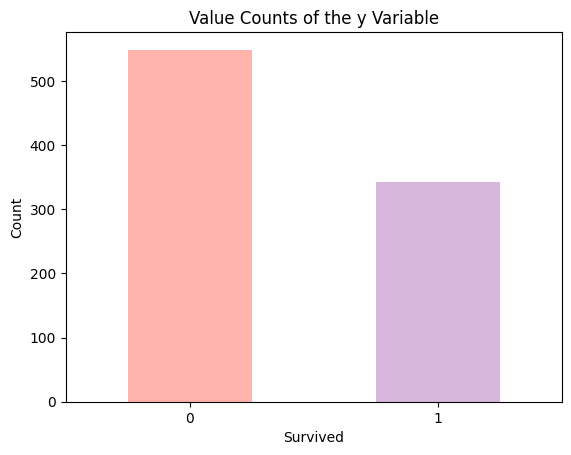

In [ ]:
df.Survived.value_counts().plot(kind="bar", color= ['#FFB3AB','#D8B7DD'])
plt.title("Value Counts of the y Variable")
plt.xlabel("Survived")
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.show()


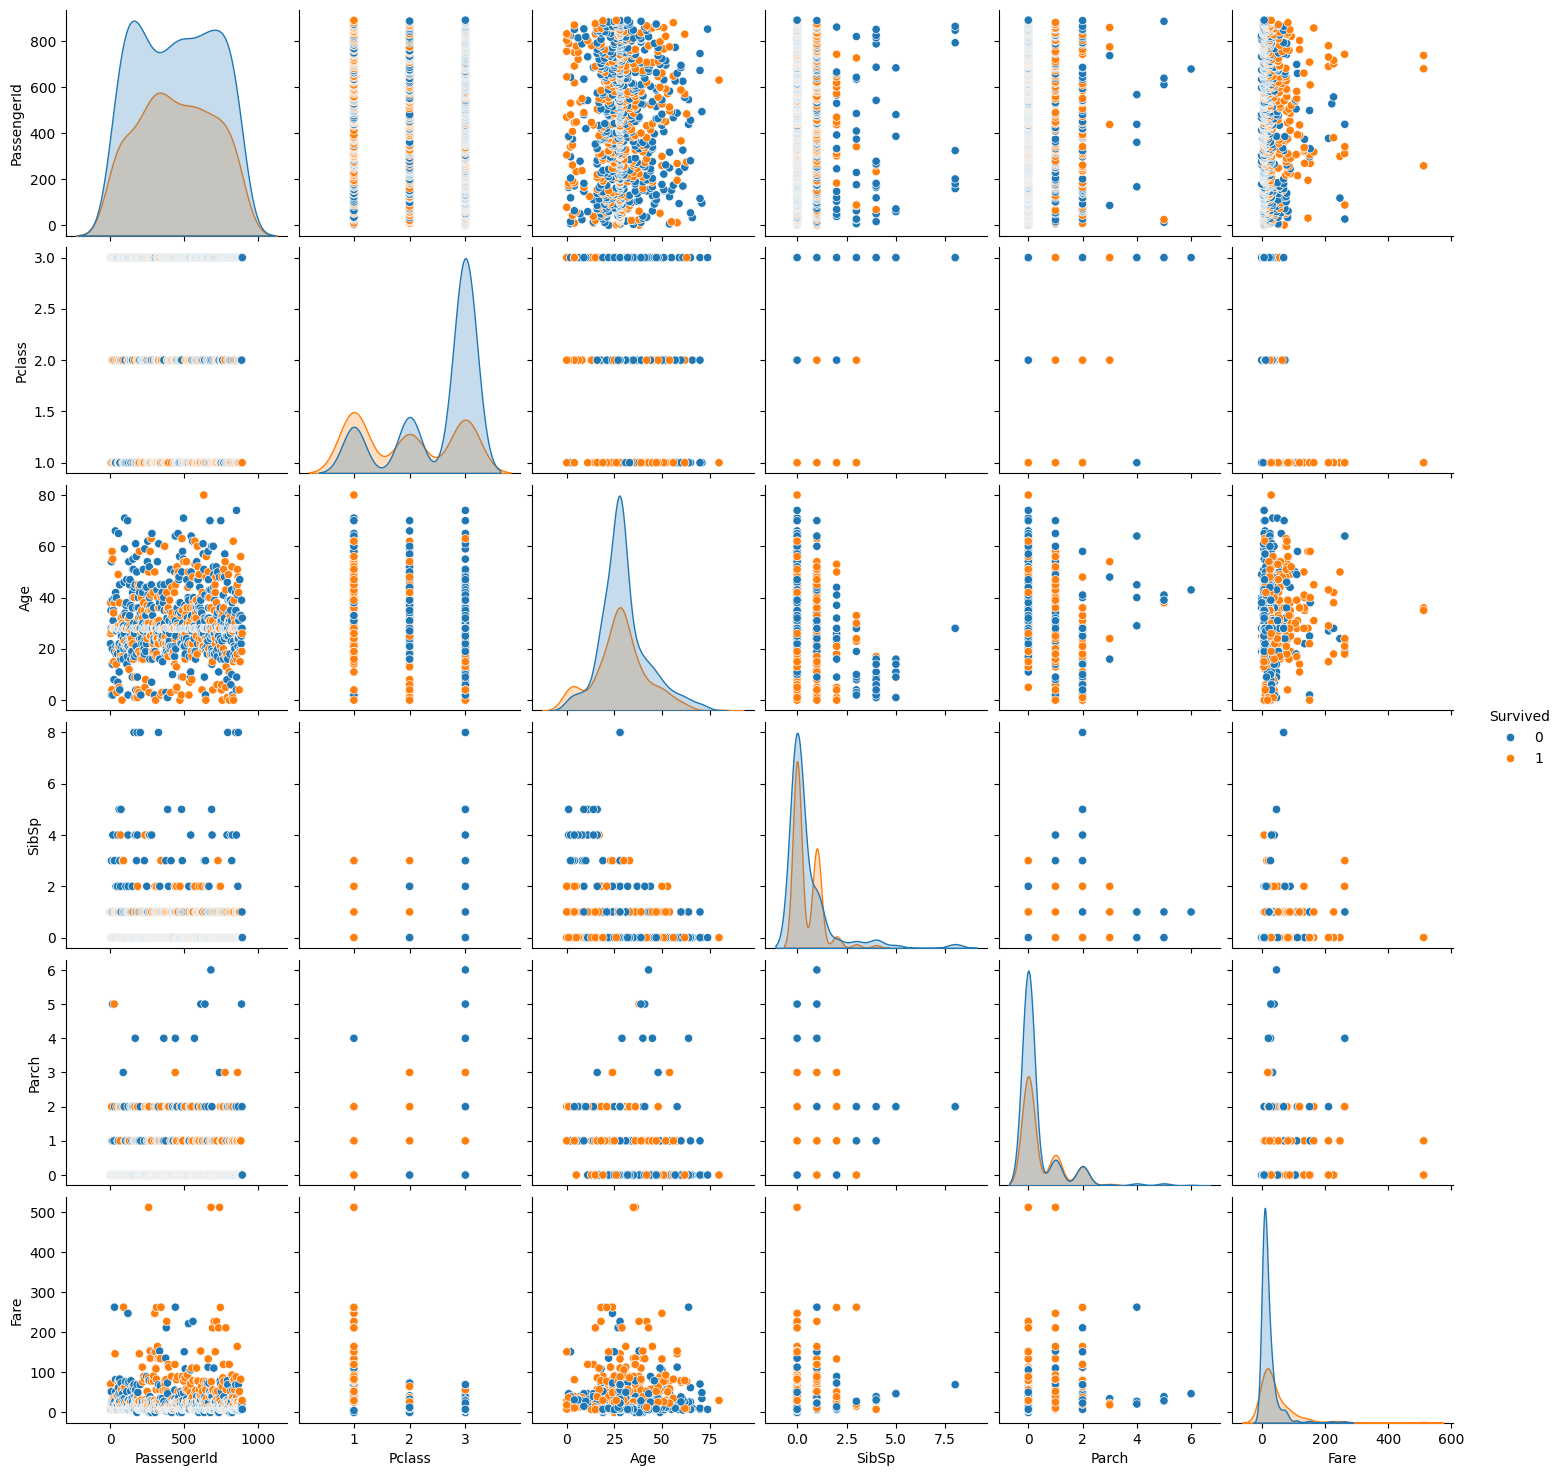

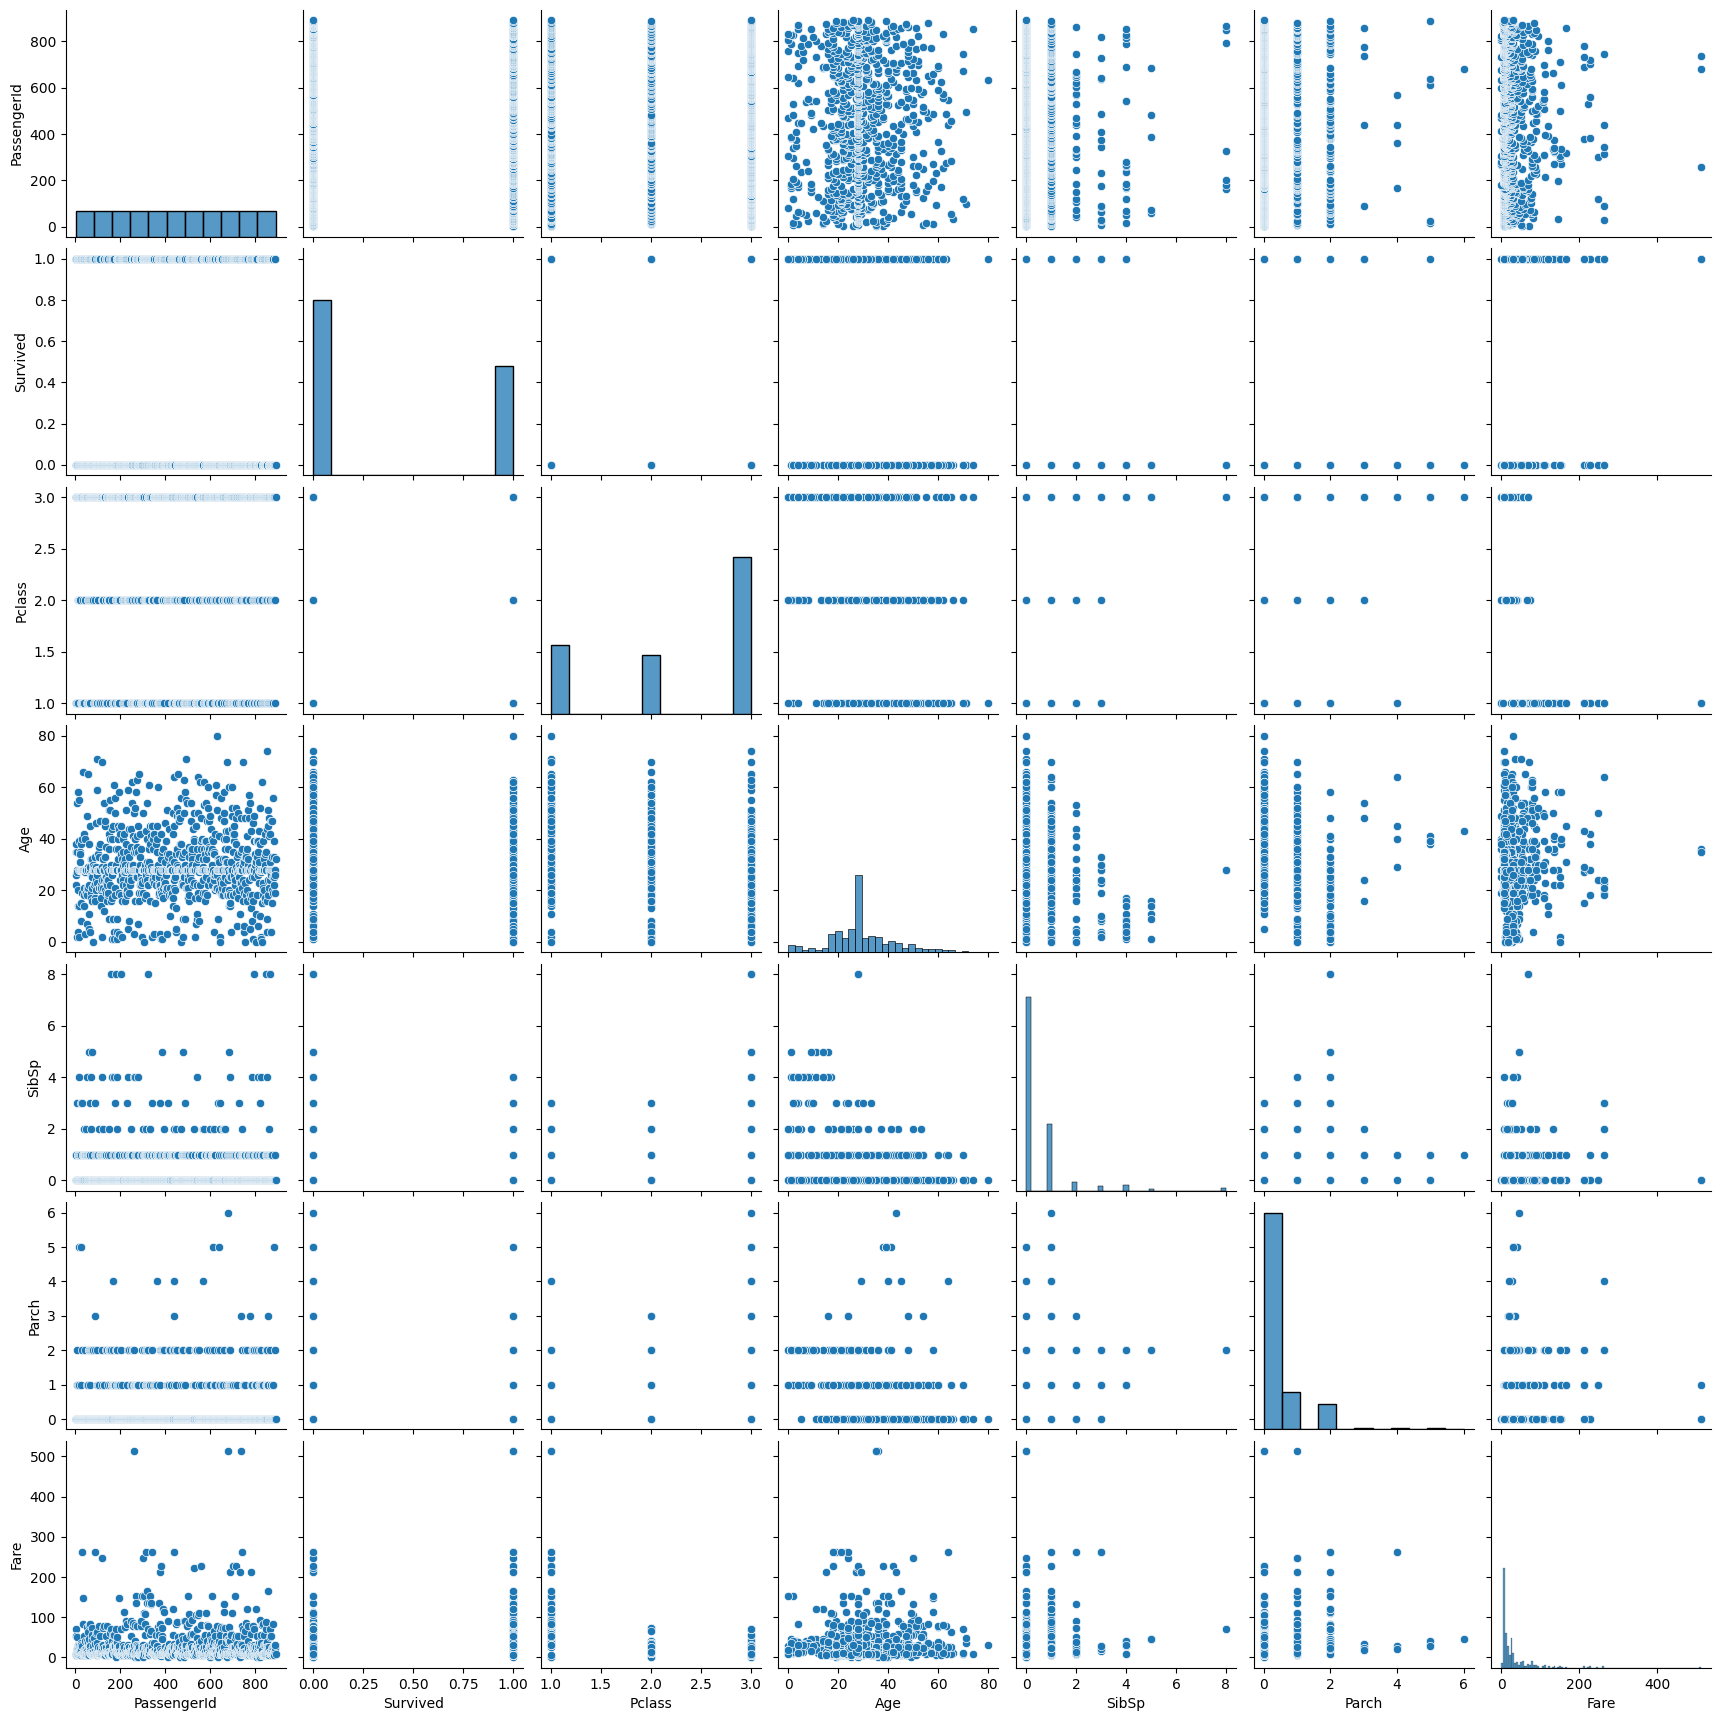

In [ ]:
"""### Relationship Between Variables"""

sns.pairplot(df, hue = "Survived")
sns.pairplot(df)

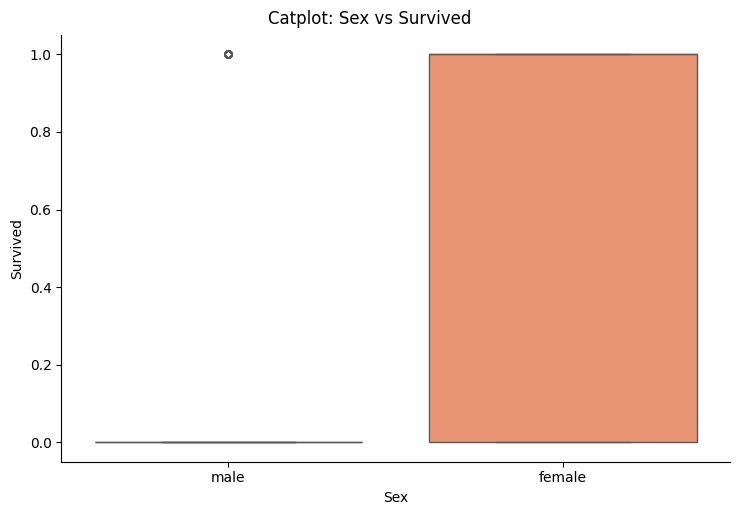

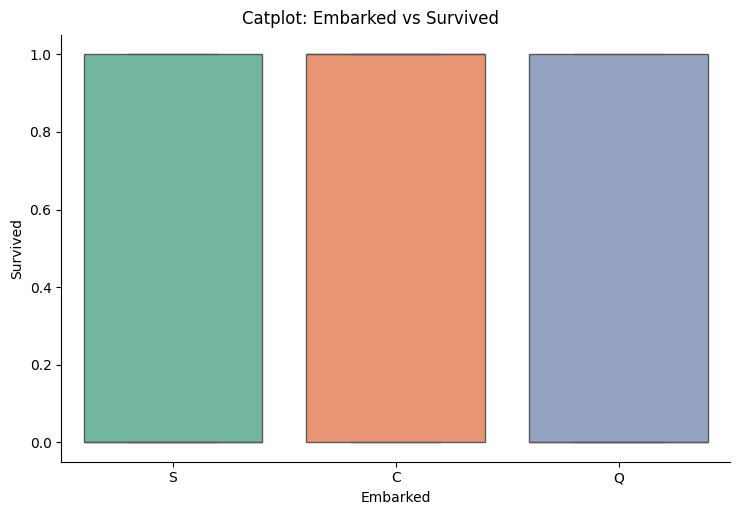

In [ ]:
"""### Catplot → category + numeric"""

categorical_cols = ['Sex', 'Embarked']

for col in categorical_cols:
    sns.catplot(x=col, y='satisfaction', data=df, kind='box', palette='Set2', height=5, aspect=1.5).fig.suptitle(f"Catplot: {col} vs satisfaction", y=1.02)


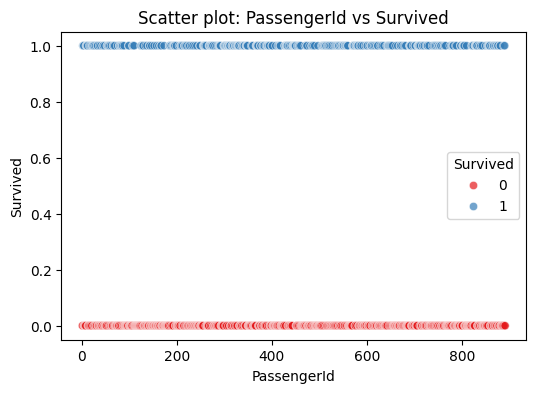

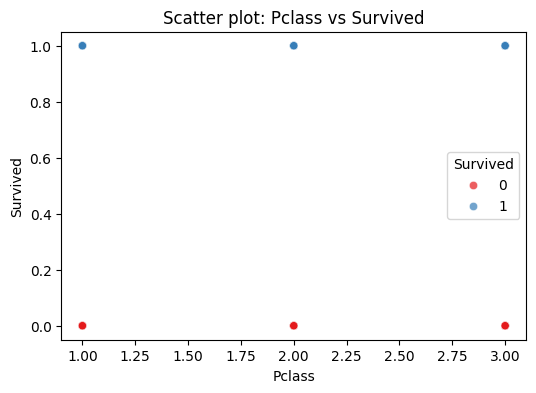

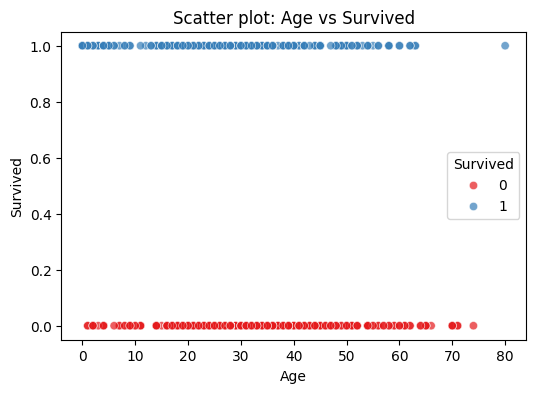

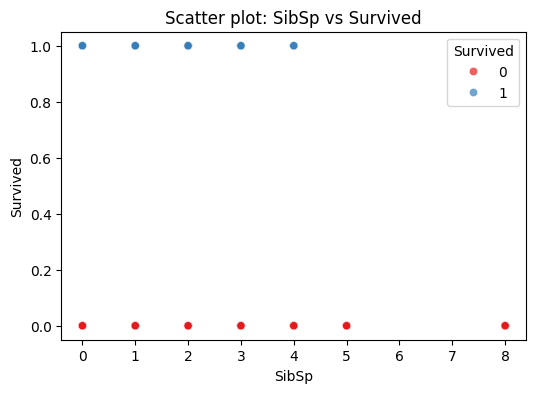

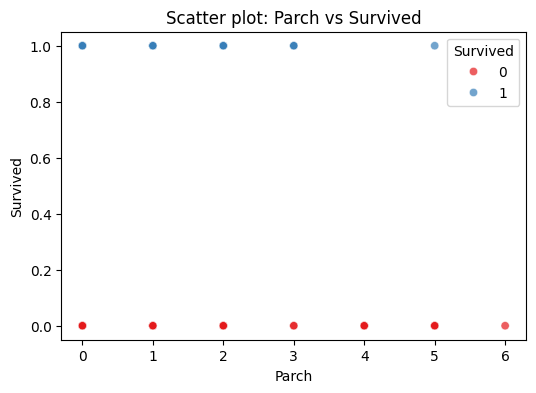

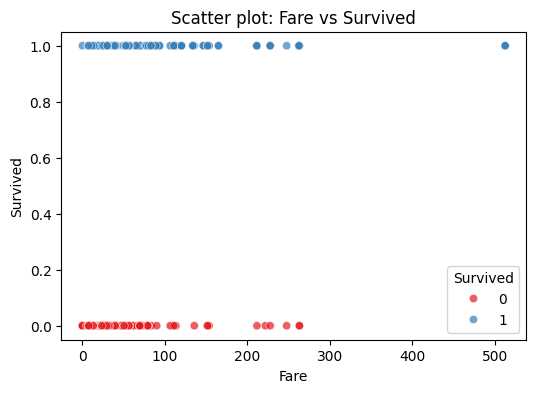

In [ ]:
"""### Scatterplot → numeric vs numeric"""

numeric_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='Survived', data=df, hue='Survived', palette="Set1", alpha=0.7)
    plt.title(f"Scatter plot: {col} vs Survived")
    plt.show()


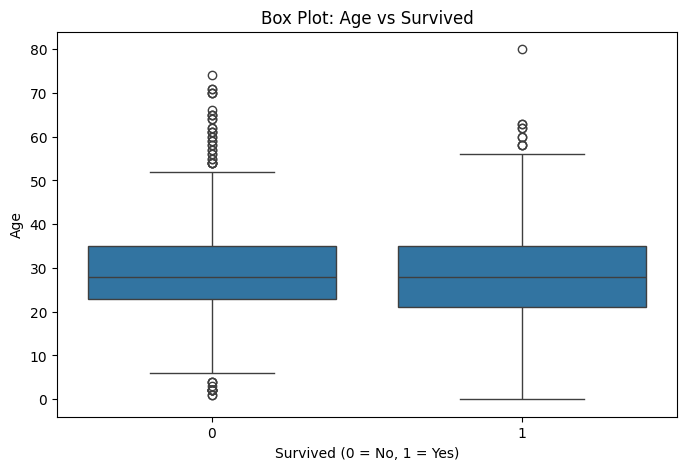

In [ ]:
#Boxplot

plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Box Plot: Age vs Survived")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


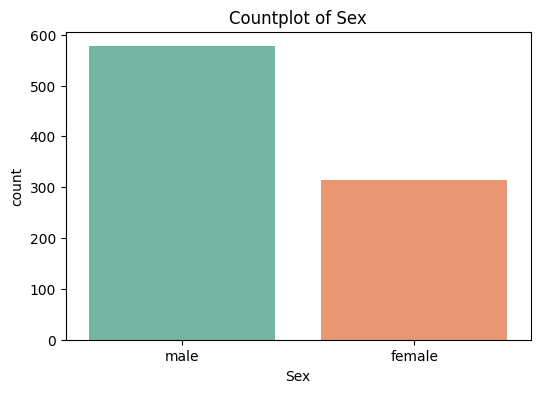

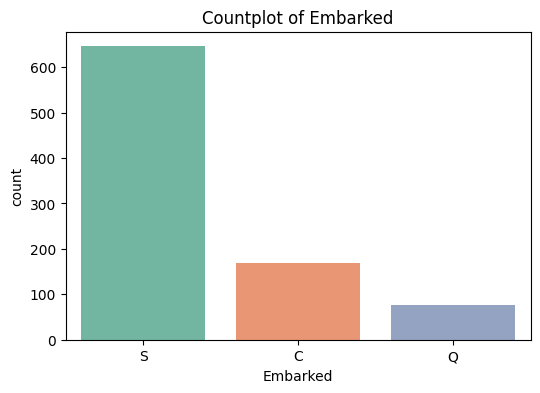

In [ ]:
""### Countplot → categorical only"""

categorical_cols = ['Sex','Embarked']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f'Countplot of {col}')
    plt.show()


In [ ]:
""### Sigmoid Function Curve"""

# Range
lim = 6
t = np.linspace(-lim, lim, 100)


In [ ]:
# Sigmoid Function
sig = 1 / (1 + np.exp(-t))


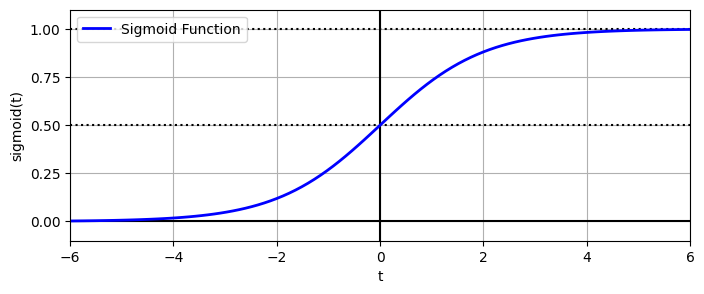

In [ ]:
# Plot
plt.figure(figsize=(8, 3))

plt.plot([-lim, lim], [0, 0], "k-")       # horizontal axis line
plt.plot([-lim, lim], [0.5, 0.5], "k:")   # dotted line at 0.5
plt.plot([-lim, lim], [1, 1], "k:")       # dotted line at 1
plt.plot([0, 0], [-1.1, 1.1], "k-")       # vertical axis line

plt.plot(t, sig, "b-", linewidth=2, label="Sigmoid Function")

plt.xlabel("t")
plt.ylabel("sigmoid(t)")
plt.legend(loc="upper left")

plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()

plt.show()


*LABEL ENCODING*

In [ ]:
"""### Label Encoding"""

# Extracting categorical columns:
catFeatures= [col for col in df.columns if col in
              df.select_dtypes(include=object).columns]

from sklearn.preprocessing import LabelEncoder
X = df
# Encoding Categorical Data
labelEncode = LabelEncoder()

# Iterating Over each categorial features:
for col in catFeatures:
    # storing its numerical value:
    X[col] = labelEncode.fit_transform(df[col])


*CORRELATION MATRIX*

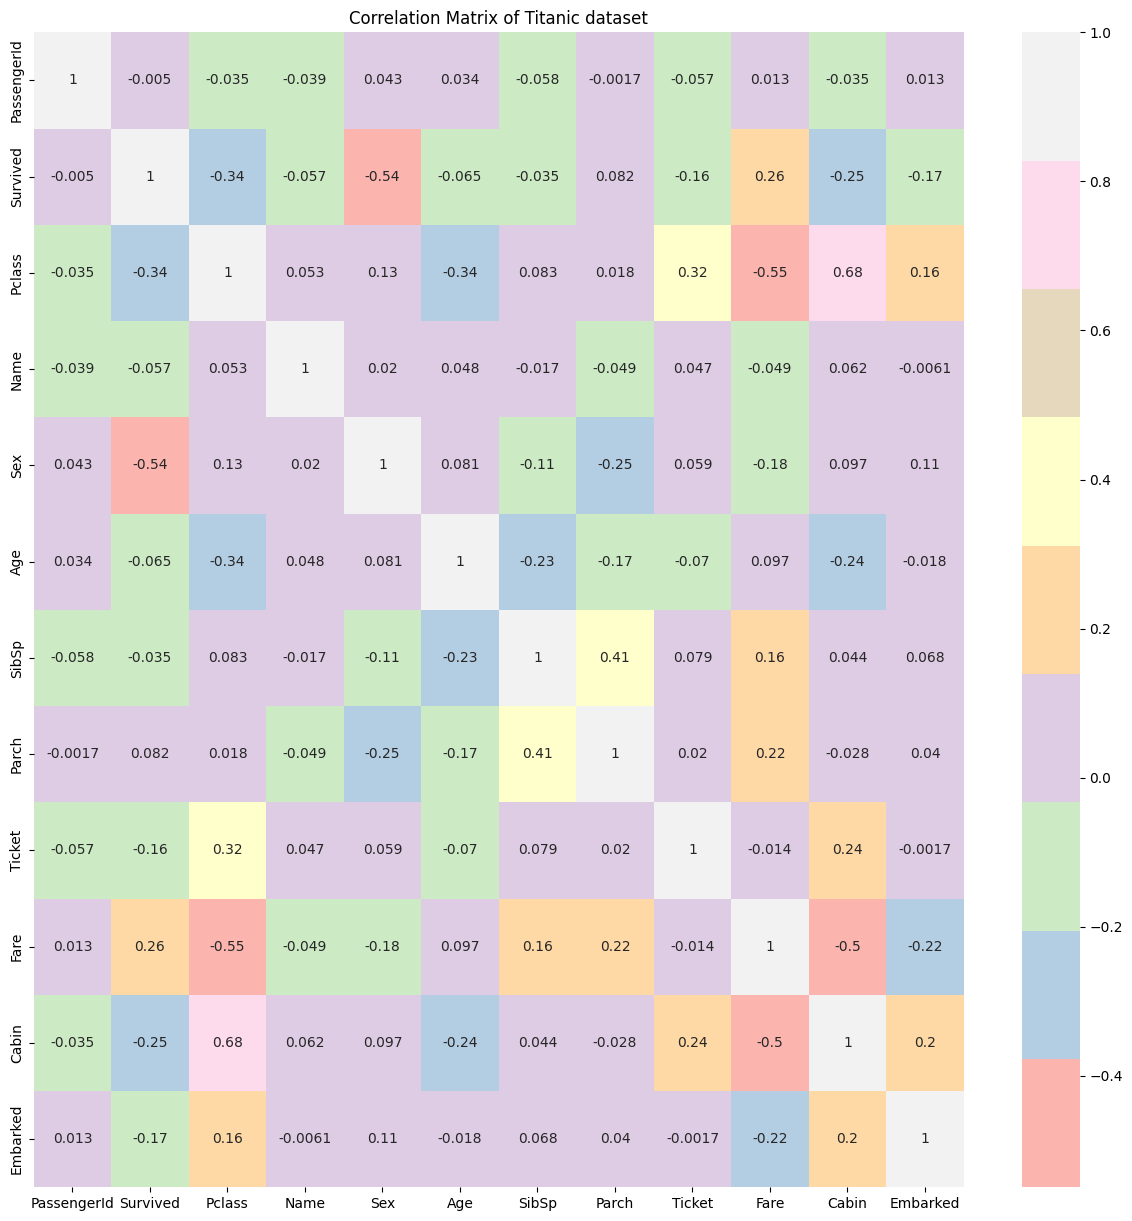

In [ ]:
"""### Correlation Matrix"""

plt.figure(figsize=(15,15))
correlation_matrix =df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1')
plt.title('Correlation Matrix of Titanic dataset')
plt.show()


*PIE CHART*

Survived ratio:
Survived
0    549
1    342
Name: count, dtype: int64


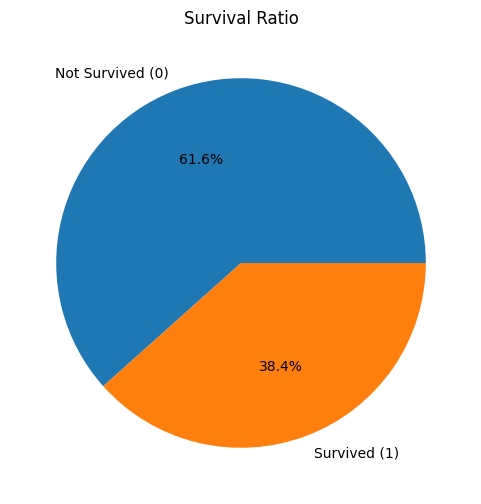

In [ ]:
""###Pie Chart"""

# Count 0 and 1
counts = df["Survived"].value_counts()

print("Survived ratio:")
print(counts)

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=["Not Survived (0)", "Survived (1)"], autopct='%1.1f%%')
plt.title("Survival Ratio")
plt.show()


*MODEL TRAIN*

In [ ]:
"""### Train-Test Split"""

y = df['Survived']
X = df.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Survived'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)
X_test.shape


(179, 8)

In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
463,2,1,48,0,0,13.0000,147,2
96,1,1,71,0,0,34.6542,12,0
401,3,1,26,0,0,8.0500,147,2
62,1,1,45,1,0,83.4750,80,2
750,2,0,4,1,1,23.0000,147,2


In [ ]:
X_train.shape

(712, 8)

*SMOTE*

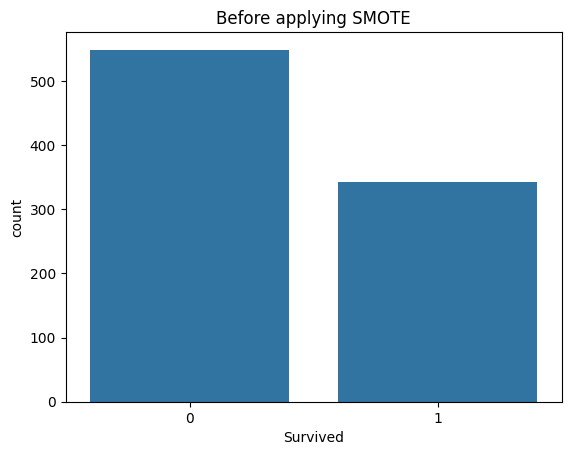

In [ ]:
"""### Oversampling using SMOTE"""

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_re, y_re = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_re, y_re, test_size = 0.25)
X.head()

sns.countplot(x ='Survived', data = df)
plt.title('Before applying SMOTE')
plt.show()


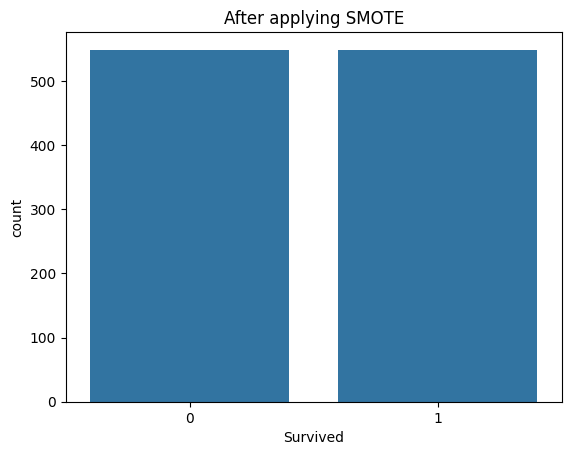

In [ ]:
# Convert y_re to DataFrame for plotting
y_resampled_df = pd.DataFrame(y_re, columns=['Survived'])

# After SMOTE
sns.countplot(x='Survived', data=y_resampled_df)
plt.title('After applying SMOTE')
plt.show()


PIPELINE

In [ ]:
# Identify numerical features. At this stage, all features in X are numerical
# due to previous label encoding of categorical features.
numeric_features_for_preprocessing = X.columns.tolist()

# Define the preprocessor to scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_for_preprocessing)
    ],
    remainder='passthrough' # Keeps other columns if any, though all are transformed here
)

# Function to create pipeline for any model
def create_pipeline(model):
    return ImbPipeline(steps=[
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

In [ ]:
pipelines = {
    "Logistic Regression": create_pipeline(LogisticRegression()),
    "Random Forest": create_pipeline(RandomForestClassifier()),
    "KNN": create_pipeline(KNeighborsClassifier()),
    "Decision Tree": create_pipeline(DecisionTreeClassifier()),
    "Naive Bayes": create_pipeline(GaussianNB()),
    "SVM": create_pipeline(SVC()),
    "XGBoost": create_pipeline(XGBClassifier())
}


TRAINING AND EVALUATION

In [ ]:
from sklearn.metrics import accuracy_score
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.8036363636363636
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       135
           1       0.82      0.79      0.80       140

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275


Model: Random Forest
Accuracy: 0.8109090909090909
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       135
           1       0.83      0.79      0.81       140

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275


Model: KNN
Accuracy: 0.8254545454545454
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       135
           1       0.84      0.81      0.82       140

    accuracy                     

*ML MODEL LOGISTIC REGRESSION*

In [ ]:
"""### Logistic Regression"""

X_test.head()

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
accuracy = score*100
print("Accuracy:", accuracy)


Accuracy: 80.36363636363636


In [ ]:
#  Display predicted vs actual
pred_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(pred_vs_actual.head(10))  # first 10 rows

#  Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nAccuracy: {accuracy:.2f}%")


     Actual  Predicted
935       1          1
904       1          0
233       1          0
363       0          0
507       1          1
634       0          1
697       1          1
971       1          1
76        0          0
489       1          0

Accuracy: 80.36%


In [ ]:
y.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

y_pred

y_test

from sklearn.metrics import confusion_matrix

# PRINT THE CONFUSION MATRIX
print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)



Confusion Matrix:
[[108  27]
 [ 25 115]]
Confusion Matrix
[[108  27]
 [ 25 115]]


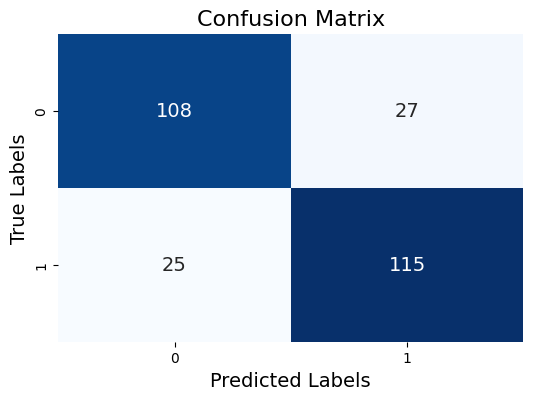

In [ ]:
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size' : 14})
plt.xlabel('Predicted Labels', fontsize = 14)
plt.ylabel('True Labels', fontsize = 14)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.81      0.80      0.81       135
           1       0.81      0.82      0.82       140

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275



In [ ]:
"""### Decision Boundary Plot for Pclass vs Fare

"""

# Select two features for plotting: Pclass and Fare (example)
x = df[["Pclass", "Fare"]].values
Y = df["Survived"].values

x_train, x_test, Y_train, Y_test = train_test_split(x, y, random_state=42)


In [ ]:
#c=2 to behave as a linear regression
model = LogisticRegression(C=2, random_state=42)
model.fit(x_train, Y_train)


LogisticRegression(C=2, random_state=42)

In [ ]:
import numpy as np

x0_min, x0_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
x1_min, x1_max = x[:, 1].min() - 10, x[:, 1].max() + 10  # Fare scale bigger

x0, x1 = np.meshgrid(np.linspace(x0_min, x0_max, 500),
                     np.linspace(x1_min, x1_max, 500))

X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = model.predict_proba(X_new)[:, 1]  # probability of Survived=1
zz = y_proba.reshape(x0.shape)



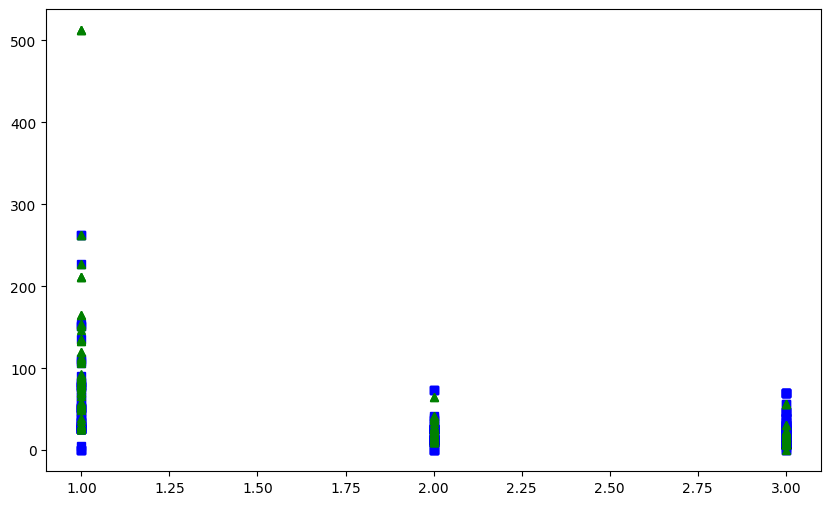

In [ ]:
# Decision boundary line
left_right = np.array([x0_min, x0_max])
boundary = -((model.coef_[0, 0] * left_right + model.intercept_[0]) / model.coef_[0, 1])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x_train[Y_train == 0, 0], x_train[Y_train == 0, 1], "bs", label="Not Survived")
plt.plot(x_train[Y_train == 1, 0], x_train[Y_train == 1, 1], "g^", label="Survived")


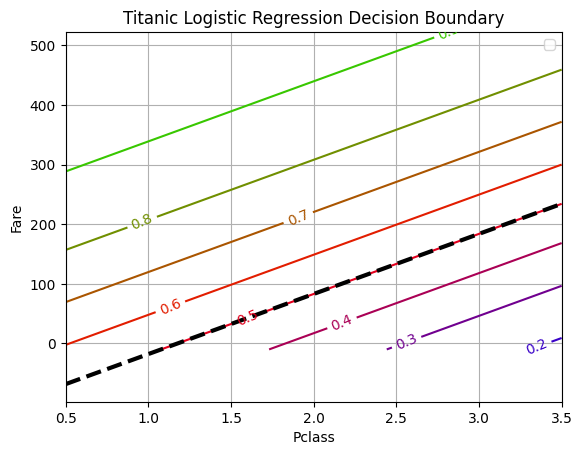

In [ ]:
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)

plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.title("Titanic Logistic Regression Decision Boundary")
plt.grid()
plt.legend()
plt.show()

*MODELS*

In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  Gaussian Naive Bayes": GaussianNB(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                Support Vector Machine": SVC(),
    "                          RandomForest": RandomForestClassifier(),
    "                    XGBoost Classifier": XGBClassifier(),
}


for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                  Gaussian Naive Bayes trained.
                   K-Nearest Neighbors trained.
                Support Vector Machine trained.
                          RandomForest trained.
                    XGBoost Classifier trained.


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 80.36%
                  Gaussian Naive Bayes: 78.91%
                   K-Nearest Neighbors: 73.45%
                Support Vector Machine: 64.00%
                          RandomForest: 81.09%
                    XGBoost Classifier: 81.82%


*MODEL SUMMARY*

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

results = {}   # to store all model scores

for name, model in models.items():
    # Train Model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    print("====================================================")
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("====================================================\n")

# Display sorted results
print("\n\n======= MODEL PERFORMANCE SUMMARY =======\n")

for name, metrics in sorted(results.items(), key=lambda x: x[1]["Accuracy"], reverse=True):
    print(f"{name}: "
          f"Accuracy={metrics['Accuracy']:.4f}, "
          f"Precision={metrics['Precision']:.4f}, "
          f"Recall={metrics['Recall']:.4f}, "
          f"F1 Score={metrics['F1 Score']:.4f}")


Model:                    Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       135
           1       0.82      0.79      0.80       140

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275

Confusion Matrix:
 [[111  24]
 [ 30 110]]

Model:                   Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       135
           1       0.80      0.78      0.79       140

    accuracy                           0.79       275
   macro avg       0.79      0.79      0.79       275
weighted avg       0.79      0.79      0.79       275

Confusion Matrix:
 [[108  27]
 [ 31 109]]

Model:                    K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       135
           1 

*CONFUSION MATRIX*

Confusion Matrix
[[111  24]
 [ 30 110]]


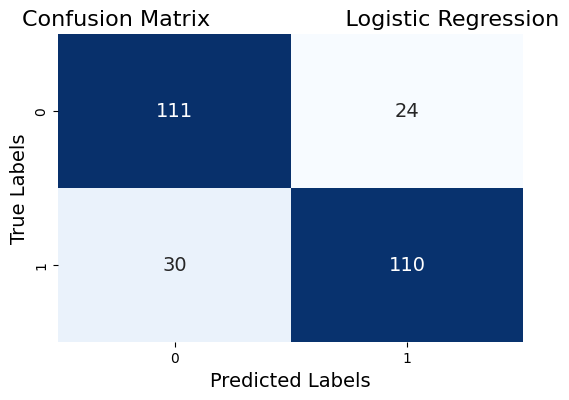

Confusion Matrix
[[108  27]
 [ 31 109]]


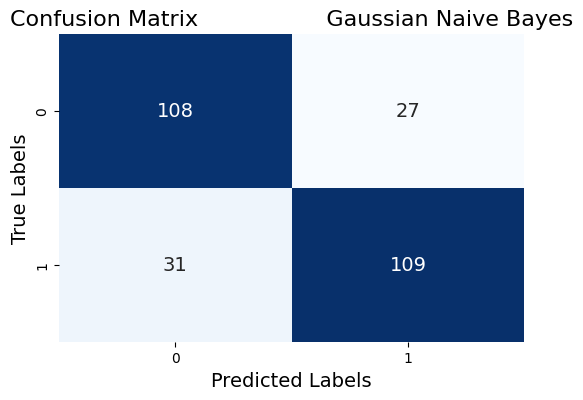

Confusion Matrix
[[ 95  40]
 [ 33 107]]


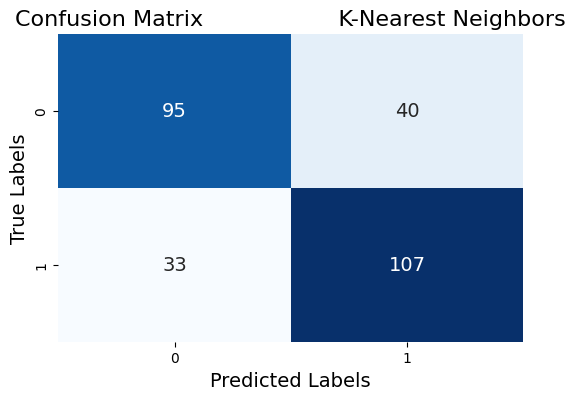

Confusion Matrix
[[107  28]
 [ 71  69]]


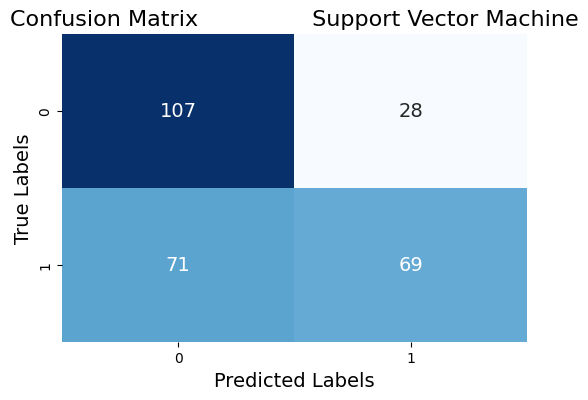

Confusion Matrix
[[114  21]
 [ 31 109]]


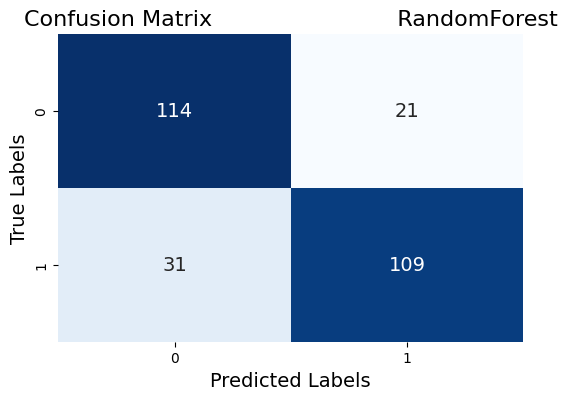

Confusion Matrix
[[109  26]
 [ 24 116]]


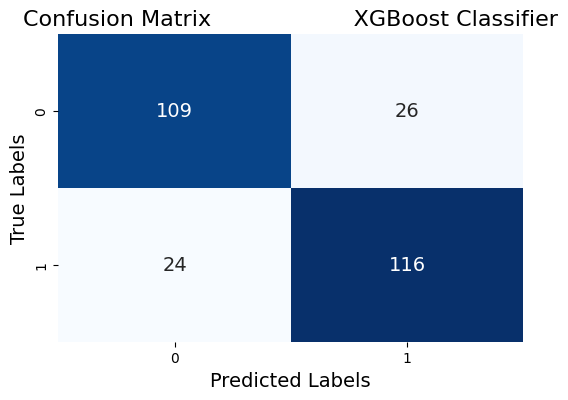

In [ ]:
for name, model in models.items():
  y_pred = model.predict(X_test)
  # PRINT THE CONFUSION MATRIX
  print("Confusion Matrix")
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  plt.figure(figsize = (6, 4))
  sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size' : 14})
  plt.xlabel('Predicted Labels', fontsize = 14)
  plt.ylabel('True Labels', fontsize = 14)
  plt.title(f'Confusion Matrix{name}', fontsize = 16)
  plt.show()

*CLASSIFICATION REPORT*

In [ ]:
from sklearn.metrics import classification_report
report = (classification_report(y_test, y_pred))
print(report)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       135
           1       0.82      0.83      0.82       140

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



In [ ]:
import pickle
# with open('model.pkl','wb') as f:
# pickle.dump(model, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


In [ ]:
print("\nSaved best pipeline to 'titanic_best_pipeline.pickle'")


Saved best pipeline to 'titanic_best_pipeline.pickle'
